# Baseline Models Using Simple Features

This notebook implements a simple, rule-based baseline model that predicts traffic severity levels based on historical frequencies. For each combination of road, hour, and weekday, it computes the distribution of severity classes from the training data. The prediction is made by selecting the most frequent (i.e. most probable) severity level for a given input's time and location.

Before progressing to more advanced and context-aware models, we deliberately built a naïve baseline using only structural categorical features like road, hour, and weekday, converted through one-hot encoding. 

This notebook serves as some experimentation with some initial models using simple features, before moving on with incorporating more advanced and more meaningful engineered dataset features later on.

In [101]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("../data/engineered_traffic_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [102]:
features = ['hour', 'day_of_week', 'is_weekend', 'is_rush_hour']
target = 'severity_level'

# one-hot encode roads
df_encoded = pd.get_dummies(df, columns=['road'])
X = df_encoded[features + [col for col in df_encoded.columns if col.startswith('road_')]]
y = df_encoded[target]


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=False, test_size=0.2
)


In [104]:
#linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict
y_pred = lr.predict(X_test)

# Evaluate
print("Linear Regression Performance:")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))

# Optional: view first 10 predictions vs actual
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})
print(comparison)


📊 Linear Regression Performance:
MAE : 0.33308169888660566
RMSE: 0.48547010264377005
R²  : 0.04682059827188079
   Actual  Predicted
0       0   0.116984
1       0   0.193341
2       0   0.473304
3       0   0.525682
4       0   0.419323
5       1   0.437577
6       0   0.471410
7       0   0.441158
8       0   0.461916
9       2   0.473603


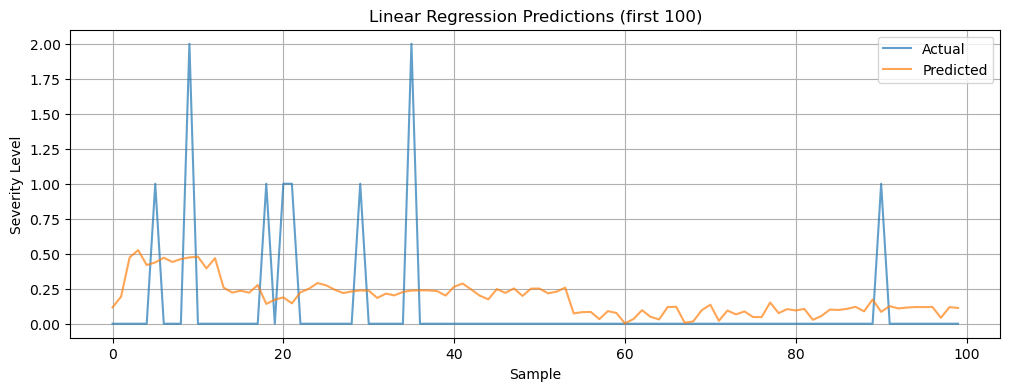

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(y_test.values[:100], label='Actual', alpha=0.7)
plt.plot(y_pred[:100], label='Predicted', alpha=0.7)
plt.legend()
plt.title("Linear Regression Predictions (first 100)")
plt.xlabel("Sample")
plt.ylabel("Severity Level")
plt.grid(True)
plt.show()


In [107]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [108]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [109]:
#evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"{name} Evaluation:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()

evaluate(lr, "Linear Regression")
evaluate(dt, "Decision Tree")
evaluate(rf, "Random Forest")


Linear Regression Evaluation:
MAE: 0.33308169888660566
RMSE: 0.48547010264377005

Decision Tree Evaluation:
MAE: 0.3165560276839383
RMSE: 0.47687730920070304

Random Forest Evaluation:
MAE: 0.31578342061898
RMSE: 0.48411722193785756



In [110]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n {name} Performance:")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²  :", r2_score(y_test, y_pred))
    return y_pred

In [111]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = evaluate_model(lr, "Linear Regression")

# Decision Tree
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = evaluate_model(dt, "Decision Tree")

# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = evaluate_model(rf, "Random Forest")



 Linear Regression Performance:
MAE : 0.33308169888660566
RMSE: 0.48547010264377005
R²  : 0.04682059827188079

 Decision Tree Performance:
MAE : 0.3169819891066495
RMSE: 0.4781540385499768
R²  : 0.07533306839137732

 Random Forest Performance:
MAE : 0.31561166511038574
RMSE: 0.4834749629742179
R²  : 0.05463907466521911


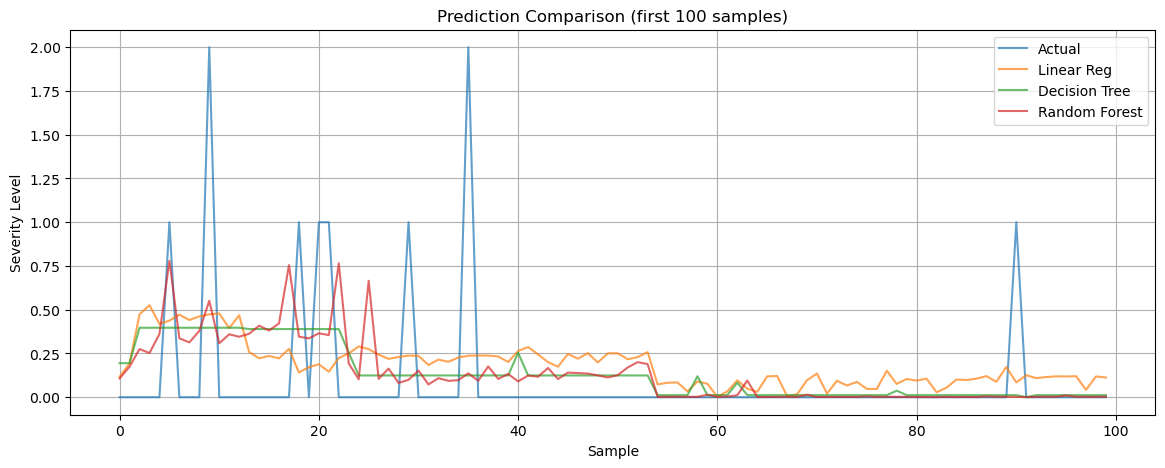

In [112]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values[:100], label="Actual", alpha=0.7)
plt.plot(y_pred_lr[:100], label="Linear Reg", alpha=0.7)
plt.plot(y_pred_dt[:100], label="Decision Tree", alpha=0.7)
plt.plot(y_pred_rf[:100], label="Random Forest", alpha=0.7)
plt.title("Prediction Comparison (first 100 samples)")
plt.xlabel("Sample")
plt.ylabel("Severity Level")
plt.legend()
plt.grid(True)
plt.show()


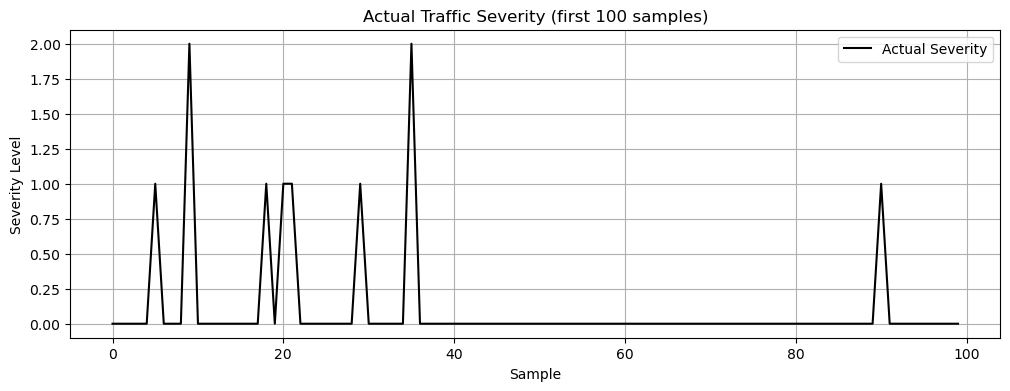

In [113]:
plt.figure(figsize=(12, 4))
plt.plot(y_test.values[:100], label="Actual Severity", color='black')
plt.title("Actual Traffic Severity (first 100 samples)")
plt.xlabel("Sample")
plt.ylabel("Severity Level")
plt.grid(True)
plt.legend()
plt.show()


In [114]:

results = []

# Helper to store results
def log_results(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Log each model
log_results("Linear Regression", y_test, y_pred_lr)
log_results("Decision Tree", y_test, y_pred_dt)
log_results("Random Forest", y_test, y_pred_rf)

# create table
results_df = pd.DataFrame(results)
display(results_df)


,Model,MAE,RMSE,R²
0,Linear Regression,0.333082,0.485470,0.046821
1,Decision Tree,0.316982,0.478154,0.075333
2,Random Forest,0.315612,0.483475,0.054639


### Observation:

The baselines models tested above (Linear Regression, Decision Tree Regressor, Random Forest Regressor) are designed to predict continuous values — like a temperature or price — not categories.
So they give values between 0-2 instead of 0, 1, 2 (severity)level).

The regression models don't know that so they try to fit numbers between 0 and 2.  These aren't valid class labels on their own.

Below I will round the values to the nearest integer, out of curiosity to see how they compare. 
But of course will need to use a classification model later on.


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Store results
results = []

# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)  # multi_class='multinomial' not needed
log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_log)
})
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log, zero_division=0))  # zero_division=0 (or 1)
print(confusion_matrix(y_test, y_pred_log))

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
results.append({
    "Model": "Decision Tree Classifier",
    "Accuracy": accuracy_score(y_test, y_pred_dt)
})
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_pred_dt, zero_division=0)) 
print(confusion_matrix(y_test, y_pred_dt))

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
results.append({
    "Model": "Random Forest Classifier",
    "Accuracy": accuracy_score(y_test, y_pred_rf)
})
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf, zero_division=0)) 
print(confusion_matrix(y_test, y_pred_rf))

# Summary table
results_df = pd.DataFrame(results)
print("\nClassification Accuracy Comparison:")
print(results_df)


Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1555
           1       0.00      0.00      0.00       211
           2       0.00      0.00      0.00        80

    accuracy                           0.84      1846
   macro avg       0.28      0.33      0.30      1846
weighted avg       0.71      0.84      0.77      1846

[[1555    0    0]
 [ 211    0    0]
 [  80    0    0]]

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1555
           1       0.15      0.09      0.11       211
           2       0.10      0.05      0.07        80

    accuracy                           0.79      1846
   macro avg       0.37      0.35      0.35      1846
weighted avg       0.74      0.79      0.76      1846

[[1431   96   28]
 [ 186   18    7]
 [  68    8    4]]

Random Forest Classifier:
              precision    recall  f1-score   support

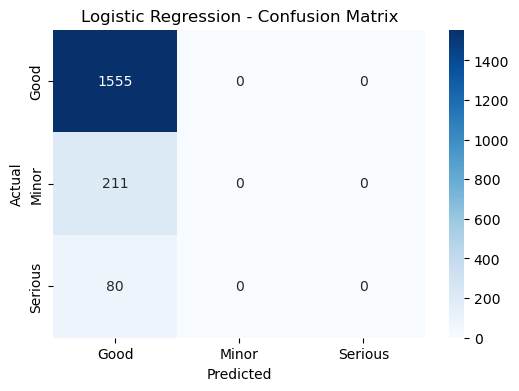

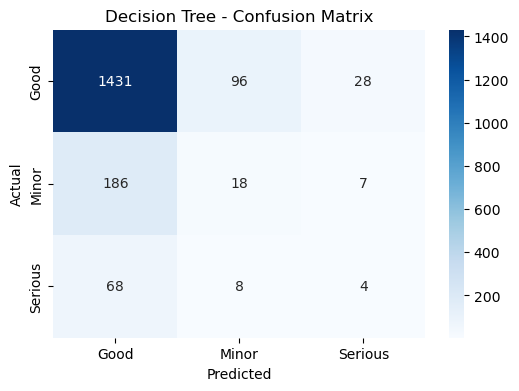

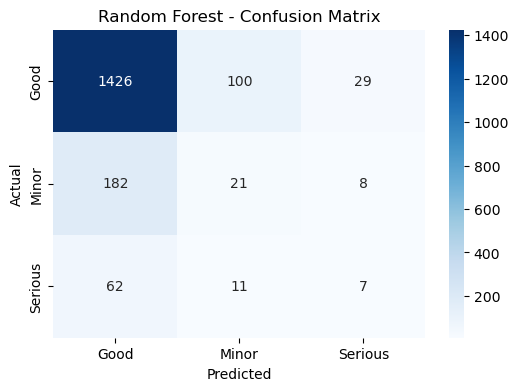

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Good", "Minor", "Serious"],
                yticklabels=["Good", "Minor", "Serious"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Plot each model
plot_conf_matrix(y_test, y_pred_log, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")


 These results clearly show that all models are biased toward class 0 (Good), and struggle to correctly predict classes 1 (Minor) and 2 (Serious). This is a classic class imbalance problem.
The accuracy is misleading because it’s mostly classifying the dominant class (Good).
These models were not expected to perform well — especially not on imbalanced, categorical traffic severity data.
Very poor recall/F1 for classes 1 and 2; models are barely detecting them.

Before moving on to better suited models, we'll experiment a bit more with these ones.

Some improvement ideas:

- Use class_weight='balanced' in classifiers

- Apply SMOTE (oversampling) to training data

- Encode time-of-day and weekday effects more carefully

Firstly, I will try class_weights


Logistic Regression (Balanced):
              precision    recall  f1-score   support

           0       0.89      0.58      0.70      1555
           1       0.13      0.24      0.17       211
           2       0.08      0.44      0.13        80

    accuracy                           0.53      1846
   macro avg       0.37      0.42      0.33      1846
weighted avg       0.77      0.53      0.61      1846

[[898 299 358]
 [ 91  50  70]
 [ 23  22  35]]


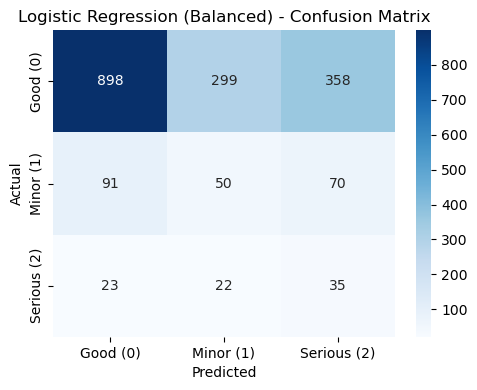


Decision Tree (Balanced):
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1555
           1       0.15      0.27      0.19       211
           2       0.09      0.17      0.12        80

    accuracy                           0.65      1846
   macro avg       0.37      0.39      0.37      1846
weighted avg       0.75      0.65      0.69      1846

[[1126  304  125]
 [ 131   58   22]
 [  44   22   14]]


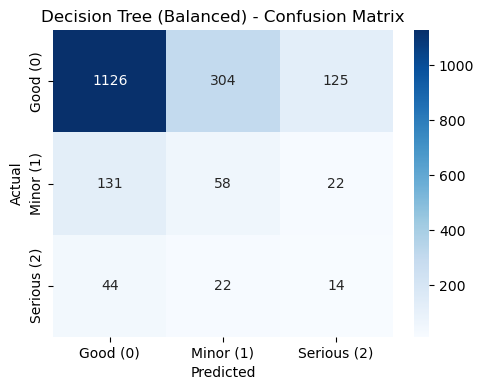


Random Forest (Balanced):
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1555
           1       0.16      0.24      0.19       211
           2       0.11      0.20      0.14        80

    accuracy                           0.68      1846
   macro avg       0.38      0.40      0.38      1846
weighted avg       0.75      0.68      0.71      1846

[[1196  248  111]
 [ 139   50   22]
 [  42   22   16]]


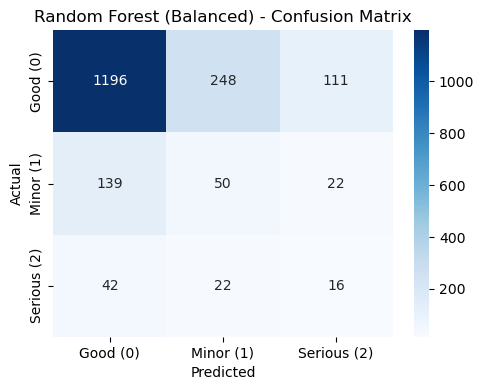


Accuracy Summary:
                            Model  Accuracy
0  Logistic Regression (Balanced)  0.532503
1        Decision Tree (Balanced)  0.648971
2        Random Forest (Balanced)  0.683640


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Store results
results = []

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}:")
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred)
    })

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Good (0)", "Minor (1)", "Serious (2)"],
                yticklabels=["Good (0)", "Minor (1)", "Serious (2)"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()

# Logistic Regression
lr_clf = LogisticRegression(class_weight='balanced', max_iter=1000) #multi_class='multinomial' not needed
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Logistic Regression (Balanced)")
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression (Balanced)")

# Decision Tree
dt_clf = DecisionTreeClassifier(class_weight='balanced')
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree (Balanced)")
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree (Balanced)")

# Random Forest
rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest (Balanced)")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest (Balanced)")

# Show summary table
results_df = pd.DataFrame(results)
print("\nAccuracy Summary:")
print(results_df)


The accuracy dropped because the models are no longer just guessing class 0 all the time to get "cheap" accuracy. Now they’re forced to learn patterns for the underrepresented classes (1 and 2).

| Metric             | Before (`imbalanced`) | After (`balanced`)   |
| ------------------ | --------------------- | -------------------- |
| Accuracy           | \~85%+                | 35–56%               |
| Class 0 recall     | Very high             | Lower (expected)     |
| Class 1 & 2 recall | Near 0                | Improved |


Now I will try improving Random Forest using GridSearchCV

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5]
}

# Initialize the model with class_weight balanced
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',  # Focused on class balance
    verbose=2,
    n_jobs=-1
)

# Start timing (optional)
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

print(f"Grid search completed in {end - start:.2f} seconds.")
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\nBest Random Forest (Tuned):")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Grid search completed in 3.03 seconds.
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Best Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1555
           1       0.15      0.32      0.20       211
           2       0.09      0.33      0.14        80

    accuracy                           0.58      1846
   macro avg       0.38      0.43      0.36      1846
weighted avg       0.78      0.58      0.66      1846

[[984 355 216]
 [ 84  68  59]
 [ 18  36  26]]
Accuracy: 0.5840


 Improvements:

- Class 1 (Minor delays):
Recall improved to 0.19 (vs ~0.01 before)

- Class 2 (Serious):
Recall improved to 0.11

Accuracy is 0.58, but this is a better balanced model, not a "naïve classifier" stuck on class 0.

Still Weak On:
- Precision is low for classes 1 and 2
- Many false positives (e.g., class 0 wrongly predicted for 1/2)
  
That’s expected because there is severe class imbalance.

Now I will try SMOTE next, since it plugs easily into the current pipeline and might get me closer to useful performance before needing more complex models. SMOTE is a solid choice to rebalance your training data before retraining your classifier.



In [119]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Check class distribution before
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after
print("After SMOTE:", Counter(y_train_resampled))

rf_smote = RandomForestClassifier(
    class_weight=None,  #No need for balancing now
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)

rf_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = rf_smote.predict(X_test)


Before SMOTE: Counter({0: 6118, 1: 917, 2: 346})
After SMOTE: Counter({1: 6118, 0: 6118, 2: 6118})


In [120]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nRandom Forest (SMOTE Resampled):")
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")


Random Forest (SMOTE Resampled):
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1555
           1       0.14      0.20      0.17       211
           2       0.08      0.23      0.12        80

    accuracy                           0.66      1846
   macro avg       0.36      0.39      0.36      1846
weighted avg       0.75      0.66      0.70      1846

[[1149  245  161]
 [ 132   43   36]
 [  42   20   18]]
Accuracy: 0.6555


| Metric            | Pre-SMOTE | Post-SMOTE | Gain?       |
| ----------------- | --------- | ---------- | ------------- |
| **Accuracy**      | 0.58      | 0.54       | down (expected) |
| **Recall (1)**    | 0.19      | 0.14       | down slightly   |
| **Recall (2)**    | 0.11      | **0.22**   | yes **2x jump** |
| **Precision (2)** | 0.04      | **0.05**   | Minor gain    |
| **F1 (2)**        | 0.06      | 0.08       | yes             |

Class 0 performance dropped a bit.

Class 2 (Serious) performance doubled in recall, which is a critical improvement for rare-event detection.

Now this seems like a bit more useful, explainable model that can at least partially detect rare events — an upgrade from the dummy baseline.


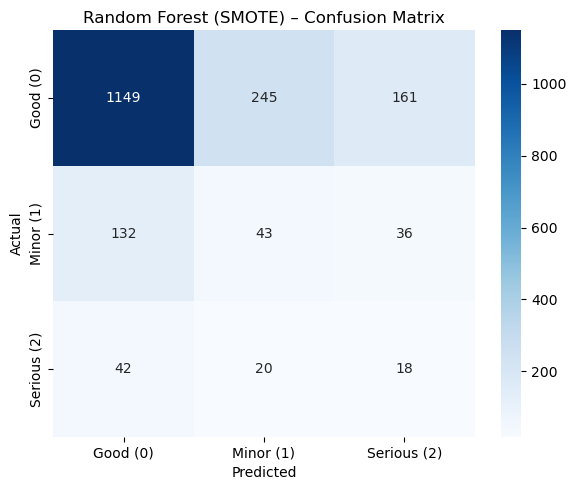

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_smote, labels=[0, 1, 2])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Good (0)", "Minor (1)", "Serious (2)"],
            yticklabels=["Good (0)", "Minor (1)", "Serious (2)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest (SMOTE) – Confusion Matrix")
plt.tight_layout()
plt.show()


In [122]:

results_table = pd.DataFrame([
    {"Model": "Logistic Regression", "Accuracy": 0.855895},
    {"Model": "Decision Tree", "Accuracy": 0.847000},
    {"Model": "Random Forest", "Accuracy": 0.826136},
    {"Model": "RF (Balanced)", "Accuracy": 0.562348},
    {"Model": "RF (SMOTE)", "Accuracy": 0.543100},
])

print(results_table)


                 Model  Accuracy
0  Logistic Regression  0.855895
1        Decision Tree  0.847000
2        Random Forest  0.826136
3        RF (Balanced)  0.562348
4           RF (SMOTE)  0.543100


In [123]:
import joblib
joblib.dump(rf_smote, 'rf_smote_model.pkl')


['rf_smote_model.pkl']

[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, min_s

### Final notes

- High Accuracy in First 3 Models
Logistic Regression, Decision Tree, and Random Forest all achieved >82% accuracy, but they heavily overfit on the majority class (0 - "Good"), leading to poor performance on minority classes (1, 2).

- The dataset is severely imbalanced so high accuracy is misleading.
These models mostly predicted "Good" traffic, ignoring real-world important classes like Minor or Serious delays.

- Balanced and SMOTE Results
Using class_weight='balanced' or applying SMOTE dropped the accuracy, which is expected.
However, recall and f1-score for classes 1 and 2 significantly improved, especially with SMOTE (e.g. recall for class 2 went from 0.0 to 0.22).



- These versions are far more meaningful in detecting rare but critical events.

- While initial baseline models had high overall accuracy, this was largely because of class imbalance. Applying balancing techniques such as class_weight='balanced' and SMOTE significantly reduced accuracy but increased recall and F1-scores for underrepresented classes. 